<a href="https://colab.research.google.com/github/theesminh04/NLPFINALEXAM/blob/main/NLPFinalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cài đặt thư viện

In [31]:
!pip install -q transformers gradio datasets
!pip install transformers datasets matplotlib

Nhập thư viện

In [3]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
import gradio as gr
import pandas as pd
import time
from datasets import load_metric


Load mô hình T5 fine-tuned

In [4]:
model_name = "vennify/t5-base-grammar-correction"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

Hàm tiền xử lý và dự đoán

In [5]:
def preprocess_text(text):
    text = text.strip()
    if not text:
        return ""
    return "grammar: " + text.lower()

def correct_grammar(text):
    start_time = time.time()
    processed_input = preprocess_text(text)
    input_ids = tokenizer.encode(processed_input, return_tensors="pt", truncation=True)

    outputs = model.generate(
        input_ids,
        max_length=64,
        num_beams=5,
        repetition_penalty=2.5,  # để giảm lặp từ
        length_penalty=1.0,
        early_stopping=True
    )
    corrected = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"⏱️ Thời gian xử lý: {time.time() - start_time:.2f}s")
    return corrected


Thử nghiệm sửa câu

In [6]:
test_sentences = [
    "she have a apple.",
    "i goes to school everyday.",
    "he don't like playing football.",
    "this are my friends.",
    "they was here yesterday.",
]

for sentence in test_sentences:
    print("❌ Gốc: ", sentence)
    print("✅ Sửa: ", correct_grammar(sentence), "\n")


❌ Gốc:  she have a apple.
⏱️ Thời gian xử lý: 2.89s
✅ Sửa:  She has an apple. 

❌ Gốc:  i goes to school everyday.
⏱️ Thời gian xử lý: 1.83s
✅ Sửa:  I go to school every day. 

❌ Gốc:  he don't like playing football.
⏱️ Thời gian xử lý: 1.67s
✅ Sửa:  He doesn't like playing football. 

❌ Gốc:  this are my friends.
⏱️ Thời gian xử lý: 0.98s
✅ Sửa:  These are my friends. 

❌ Gốc:  they was here yesterday.
⏱️ Thời gian xử lý: 0.95s
✅ Sửa:  They were here yesterday. 



Giao diện Gradio

In [34]:
import gradio as gr
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

# Giao diện nâng cấp
with gr.Blocks(theme=gr.themes.Default(primary_hue="blue")) as app:
    gr.Markdown(
        """
        # 🧠 Grammar Correction App
        Sửa lỗi ngữ pháp tiếng Anh bằng mô hình T5 đã fine-tuned
        👉 Nhập một câu sai bên dưới và nhấn **Sửa lỗi** để xem kết quả.
        """,
        elem_id="title",
    )

    with gr.Row():
        input_text = gr.Textbox(
            lines=3,
            placeholder="Ví dụ: she have a book.",
            label="❌ Câu cần sửa",
            elem_id="input_text",
            autofocus=True,
        )
        output_text = gr.Textbox(
            label="✅ Câu đã sửa",
            lines=3,
            interactive=False,
            elem_id="output_text",
        )

    with gr.Row():
        submit_btn = gr.Button("✍️ Sửa lỗi", variant="primary")
        clear_btn = gr.Button("🧹 Xoá")

    submit_btn.click(correct_grammar, inputs=input_text, outputs=output_text)
    clear_btn.click(lambda: ("", ""), inputs=[], outputs=[input_text, output_text])

# Chạy
app.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://56b58424945ec2af3e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [21]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "vennify/t5-base-grammar-correction"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


Load mô hình và dữ liệu

In [25]:
import pandas as pd

# Đọc file từ Colab/PC
df = pd.read_csv("/content/drive/MyDrive/Grammar Correction.csv")

# Loại bỏ dòng lỗi
df = df.dropna(subset=["Ungrammatical Statement", "Standard English"])
inputs = df["Ungrammatical Statement"].astype(str).tolist()
targets = df["Standard English"].astype(str).tolist()


Hàm sửa lỗi

In [26]:
def correct_grammar(text):
    input_text = "grammar: " + text
    input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True)
    output = model.generate(
        input_ids,
        max_length=64,
        num_beams=5,
        repetition_penalty=2.5
    )
    return tokenizer.decode(output[0], skip_special_tokens=True)


Tính BLEU theo từng câu

In [28]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import matplotlib.pyplot as plt

smoothie = SmoothingFunction().method4
bleu_scores = []
predictions = []

for inp, ref in zip(inputs[:50], references[:50]):  # giới hạn để dễ chạy
    pred = correct_grammar(inp)
    predictions.append(pred)
    score = sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothie)
    bleu_scores.append(score)


Vẽ biểu đồ BLEU

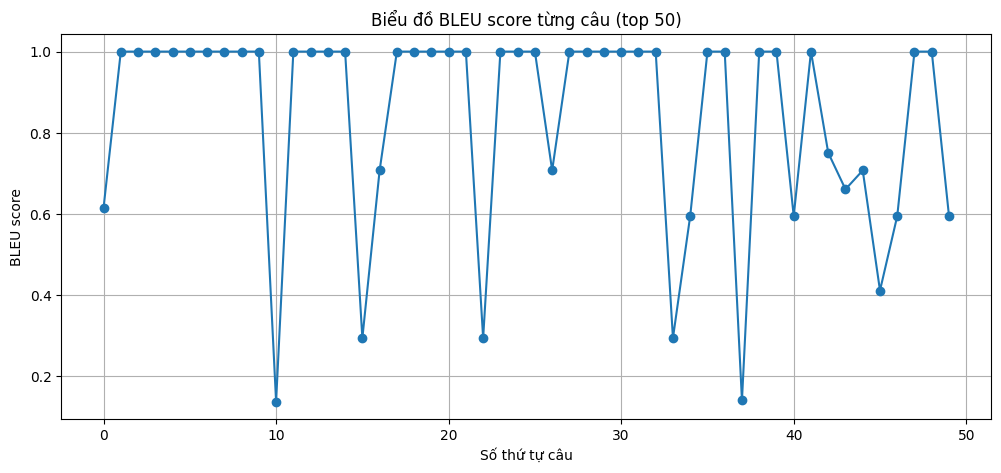

In [29]:
plt.figure(figsize=(12, 5))
plt.plot(bleu_scores, marker='o')
plt.title("Biểu đồ BLEU score từng câu (top 50)")
plt.xlabel("Số thứ tự câu")
plt.ylabel("BLEU score")
plt.grid(True)
plt.show()
